# Hate Speech Detection on Twitter Using Machine Learning

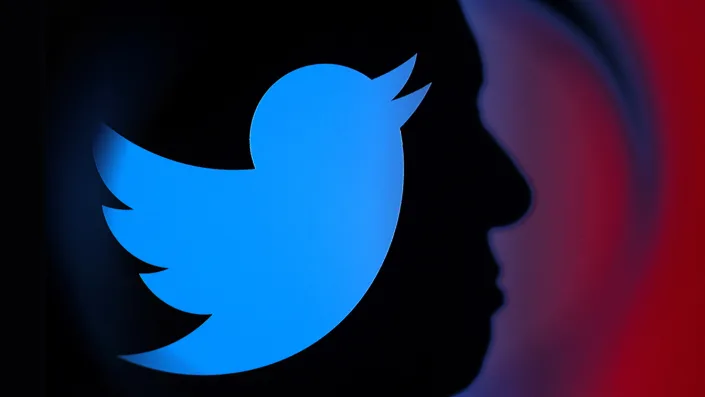

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import re
import nltk
from nltk.util import pr
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

In [3]:
twitter_data=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\twitter_data.csv")
twitter_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# shape of dataset
twitter_data.shape

(24783, 7)

In [5]:
# information about dataset
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
#Describe of dataset
twitter_data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
# find ot null value in dataset
twitter_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [8]:
# index of dataset
twitter_data.index

RangeIndex(start=0, stop=24783, step=1)

In [9]:
 # Dtypes of dataset
twitter_data.dtypes

Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [10]:
# Add new column
twitter_data['labels']=twitter_data['class'].map({0:"Hate speech Detected",1:"Offensive Language detected",3:"No hate and offensive speech"})
twitter_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language detected


In [11]:
twitter_data=twitter_data[['tweet','labels']]
twitter_data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language detected


In [12]:
# Cleaning the statement
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\s+|www.\.\s+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
twitter_data["tweet"]=twitter_data["tweet"].apply(clean)

In [13]:
twitter_data['labels'] = twitter_data['labels'].fillna(0)

In [21]:
twitter_data.replace({'labels':{'Hate speech Detected':1,'Offensive Language detected':2,'No hate and offensive speech':3}},inplace=True)
twitter_data.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,0
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,2
2,rt urkindofbrand dawg rt ever fuck bitch sta...,2
3,rt cganderson vivabas look like tranni,2
4,rt shenikarobert shit hear might true might f...,2


In [22]:
#separting data 
X=np.array(twitter_data['tweet'])
y=np.array(twitter_data['labels'])
print(X)
print(y)

[' rt mayasolov woman shouldnt complain clean hous amp man alway take trash'
 ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place'
 ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit' ...
 'young buck wanna eat dat nigguh like aint fuckin dis'
 'youu got wild bitch tellin lie'
 'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll ']
[0 2 2 ... 2 2 0]


In [23]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [24]:
#training and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (16604, 26151)
shape of X_test=  (8179, 26151)
shape of y_train=  (16604,)
shape of y_test=  (8179,)


In [25]:
# Creating the model
model=DecisionTreeRegressor()

In [26]:
# Fit the model
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
test_data="i will kill you"
twitter_data=cv.transform([test_data]).toarray()

In [33]:
print(model.predict(twitter_data))

[0.33333333]


In [37]:
predection=0